Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. Create a convolutional neural network that trains to 100% accuracy on these images, which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

# Import Required Libraries

In [1]:
# Import Required Libraries
import tensorflow as tf
import os
import zipfile

In [2]:
# DESIRED_ACCURACY Value
DESIRED_ACCURACY = 0.999

#Using callbacks to stop training when it reaches a specific value for some metric
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    #Check the accuracy
    if(logs.get('accuracy') >= DESIRED_ACCURACY): # Experiment with changing this value
      #Stop if Threshold is met
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()

# Download the Required Zipfile

In [ ]:
# Download happy-or-sad
!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"
    
# Unzip the dataset
zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

--2022-02-14 00:52:53--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 74.125.140.128, 108.177.15.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.05s   

2022-02-14 00:52:53 (55.0 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



#Exploratory Data Analysis (EDA)

In [ ]:
import os

# Directory with our training happy pictures
train_happy_dir = os.path.join('/tmp/h-or-s/happy')

# Directory with our training sad pictures
train_sad_dir = os.path.join('/tmp/h-or-s/sad')

In [ ]:
train_happy_names = os.listdir(train_happy_dir)
print(train_happy_names[:10])

train_sad_names = os.listdir(train_sad_dir)
print(train_sad_names[:10])

['happy1-02.png', 'happy1-03.png', 'happy2-08.png', 'happy2-06.png', 'happy1-12.png', 'happy1-00.png', 'happy2-11.png', 'happy1-18.png', 'happy2-16.png', 'happy2-19.png']
['sad2-18.png', 'sad1-07.png', 'sad2-19.png', 'sad2-04.png', 'sad1-00.png', 'sad2-06.png', 'sad1-19.png', 'sad2-13.png', 'sad1-18.png', 'sad1-11.png']


In [ ]:
print('total training happy images:', len(os.listdir(train_happy_dir)))
print('total training sad images:', len(os.listdir(train_sad_dir)))

total training happy images: 40
total training sad images: 40


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

display a batch of 8 horse and 8 human pictures. You can rerun the cell to see a fresh batch each time:

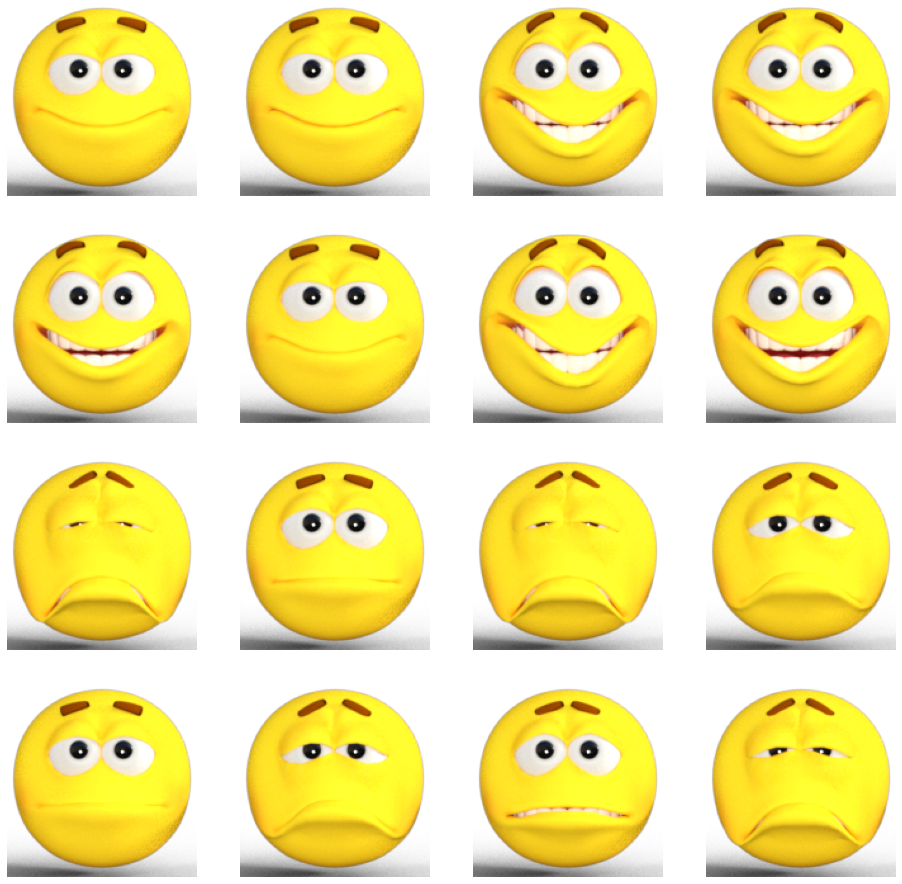

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_happy_pix = [os.path.join(train_happy_dir, fname) 
                for fname in train_happy_names[pic_index-8:pic_index]]
next_sad_pix = [os.path.join(train_sad_dir, fname) 
                for fname in train_sad_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_happy_pix+next_sad_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Building The Model

In [ ]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
tf.keras.layers.MaxPool2D(2,2),
# Main layers for the model
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

# Compile the model
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics = ['accuracy'])

In [ ]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    '/tmp/h-or-s',
    target_size=(150, 150),
    batch_size=10,
    class_mode='binary'
)
# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [ ]:
# This code block should call model.fit and train for
# a number of epochs. 
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=20,
    verbose=1,
    callbacks=[callbacks]
)
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/20
8/8 [==============================] - 10s 26ms/step - loss: 1.2388 - accuracy: 0.5625
Epoch 2/20
8/8 [==============================] - 0s 27ms/step - loss: 0.4005 - accuracy: 0.8500
Epoch 3/20
8/8 [==============================] - 0s 29ms/step - loss: 0.1995 - accuracy: 0.9375
Epoch 4/20
8/8 [==============================] - 0s 24ms/step - loss: 0.2561 - accuracy: 0.9125
Epoch 5/20
8/8 [==============================] - 0s 27ms/step - loss: 0.0896 - accuracy: 0.9625
Epoch 6/20
8/8 [==============================] - 0s 25ms/step - loss: 0.0461 - accuracy: 0.9875
Epoch 7/20
7/8 [=========================>....] - ETA: 0s - loss: 0.0279 - accuracy: 1.0000
Reached 99.9% accuracy so cancelling training!
8/8 [==============================] - 0s 24ms/step - loss: 0.0247 - accuracy: 1.0000


In [ ]:
# Model History Keys
history.history.keys()

dict_keys(['loss', 'accuracy'])

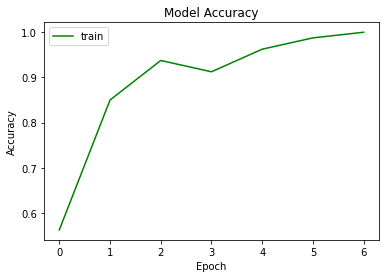

In [ ]:
# Plot Accuracy Curve 
plt.plot(history.history['accuracy'], 'g')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

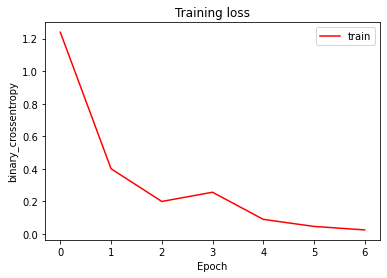

In [ ]:
# Plot Loss Curve 
plt.plot(history.history['loss'], 'r', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epoch')
plt.ylabel('binary_crossentropy')
plt.legend(['train'], loc='upper right')
plt.show()

#Extra Part: Model Prediction

In [ ]:
# Model predictions
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
    
  if classes[0]>0.5:
    print(fn + " Sad Face :(")
  else:
    print(fn + " Happy Face :)")

Saving happy1-00.png to happy1-00.png
Saving happy1-06.png to happy1-06.png
[0.27393308]
happy1-00.png Happy Face :)
[0.00045118]
happy1-06.png Happy Face :)


##Visualizing Intermediate Representations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


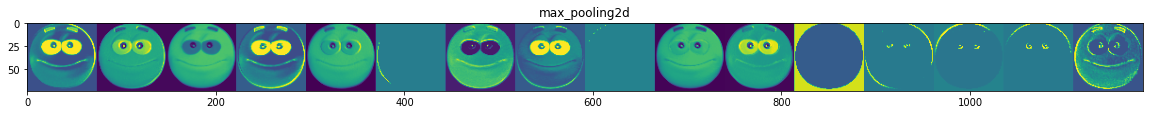

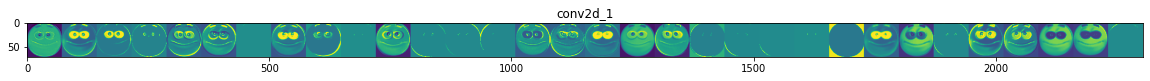

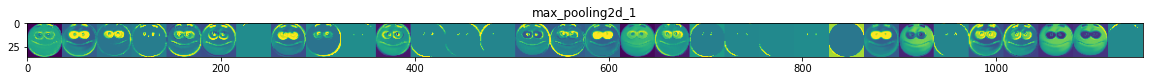

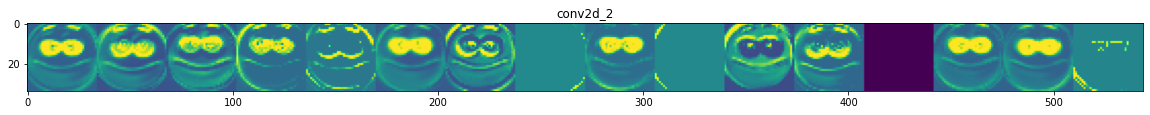

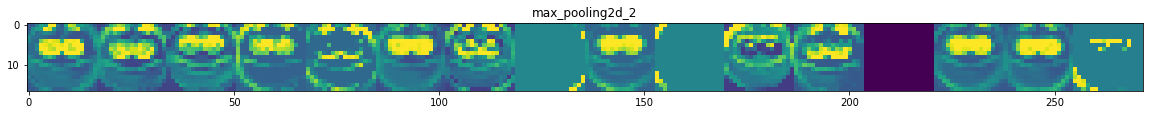

In [ ]:
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
happy_img_files = [os.path.join(train_happy_dir, f) for f in train_happy_names]
sad_img_files = [os.path.join(train_sad_dir, f) for f in train_sad_names]
img_path = random.choice(happy_img_files + sad_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Clean Up

Run the following cell to terminate the kernel and free memory resources:

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)